# Regression using sci-kit learn

In [11]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# generating data
X, y = make_regression(n_samples=100, n_features=5, n_informative=3, n_targets=1, noise=0.2, random_state=42)
X[:, 1] = X[:, 0] * 100 #Make a variable redundant and scale it poorly

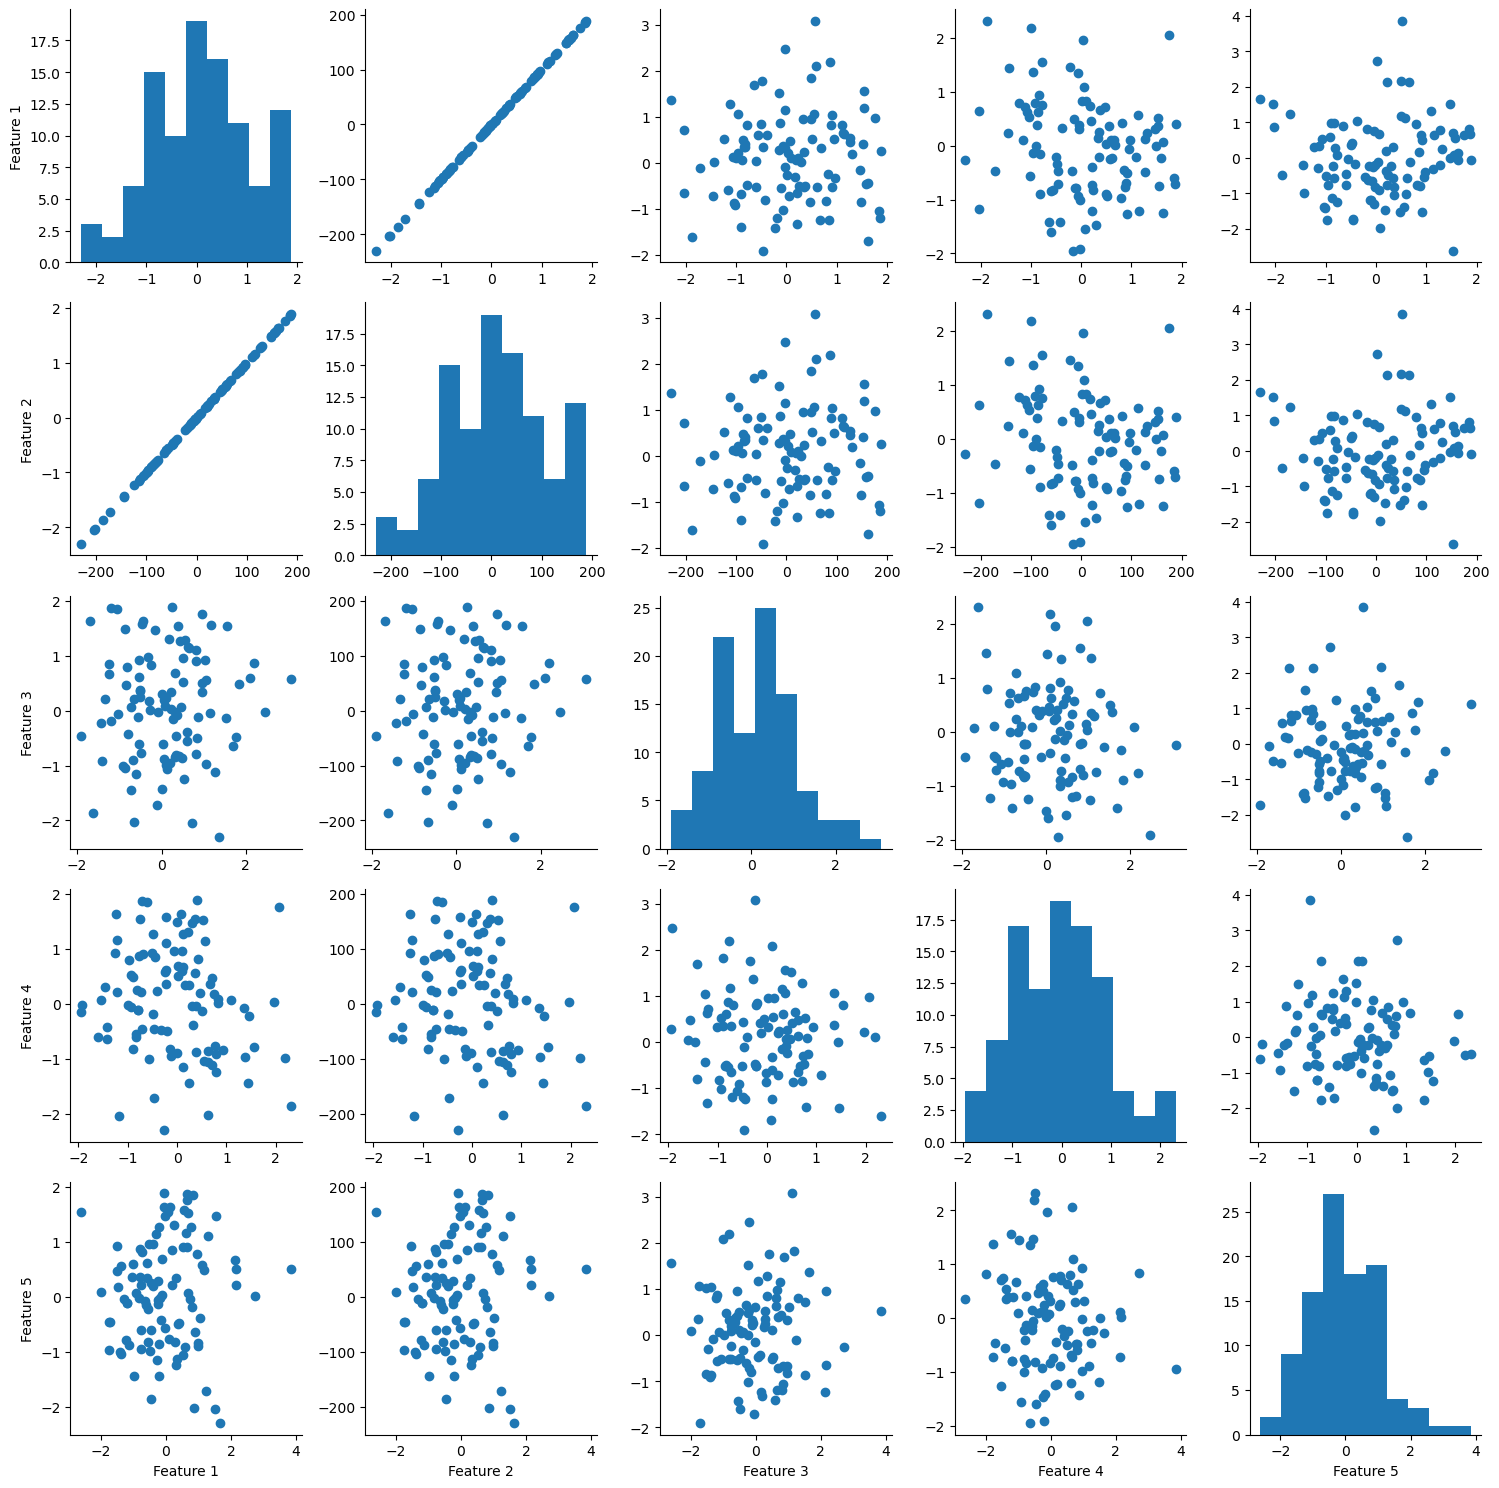

In [10]:
# create subplots
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# iterate through all combinations of features
for xx in range(5):
    for yy in range(5):
        # plot features in the corresponding subplot
        if xx == yy:
            axs[xx, yy].hist(X[:, xx], bins=10)
        else:
            axs[xx, yy].scatter(X[:, xx], X[:, yy])
        # remove spines and ticks from the plot
        axs[xx, yy].spines['top'].set_visible(False)
        axs[xx, yy].spines['right'].set_visible(False)
        axs[xx, yy].xaxis.set_ticks_position('bottom')
        axs[xx, yy].yaxis.set_ticks_position('left')
        
        # create axis labels for the bottom and left subplots only
        if xx == 4:
            axs[xx, yy].set_xlabel('Feature %d' % (yy+1))
        if yy == 0:
            axs[xx, yy].set_ylabel('Feature %d' % (xx+1))

plt.tight_layout()
plt.show()

In [18]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_
print(model.coef_)
print(model.intercept_)

# evaluate the quality of the fit on the test set
y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)

print("Mean squared error on the test set: {:.2f}".format(mse))

[6.04724836e-03 6.04724836e-01 1.48881111e+00 6.40469640e+01
 1.67379485e+00]
-5.3785726676885295
Mean squared error on the test set: 1043.63


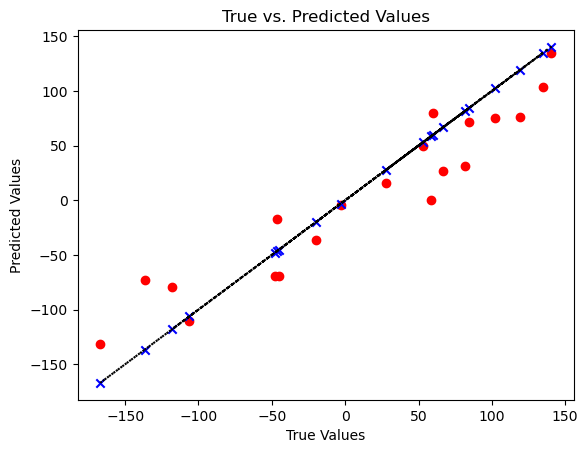

In [16]:
# plot the true values in blue and the predicted values in red
plt.scatter(y_test, y_pred, color='red')
plt.scatter(y_test, y_test, color='blue', marker='x')
plt.plot(y_test, y_test, linestyle='dotted', color='black')
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

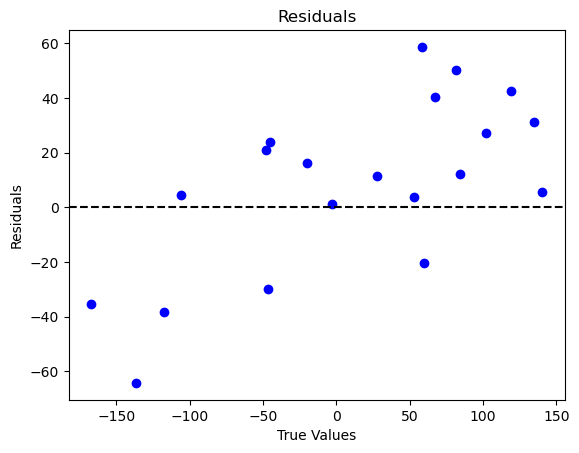

In [17]:
# calculate the residuals
residuals = y_test - y_pred

# plot the residuals
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, linestyle='dashed', color='black')
plt.title('Residuals')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()